In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:

X= pd.read_csv('data/train.csv')
X=X.drop(X.columns[0],axis=1)
X

,Open
0,0.049579
1,0.049895
2,0.043579
3,0.036526
4,0.041368
...,...
1814,0.421368
1815,0.421263
1816,0.410316
1817,0.410632


In [3]:


# Load time series data


# Define hyperparameter grid

window_size=3
# Define sliding window function
def sliding_window(X, window_size):
    X_windows = []
    y=[]
    for i in range(len(X)-window_size):
        X_windows.append(X[i:i+window_size])
        y.append(X[i+window_size])
    return np.array(X_windows),np.array(y)

# Apply sliding window approach to training data



In [4]:
best_score = float('inf')
final_params = {}
final_window_size = None
mse_scores = []

for window_size in range(1, 11):  # assuming you want window sizes from 1 to 10
    X_windows, y = sliding_window(X['Open'], window_size)
    X_train = pd.DataFrame(X_windows.reshape(-1, window_size))
    
    param_grid = {
        'max_depth': [None, 5, 10, 15, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    }

    # Define decision tree model
    model = DecisionTreeRegressor(random_state=42)

    # Perform hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=4)
    grid_search.fit(X_train, y)
    mse_scores.append(grid_search.best_score_)

    
    # Print best hyperparameters
    if grid_search.best_score_ < best_score:
        best_score = grid_search.best_score_
        final_window_size = window_size
        final_params = grid_search.best_params_

# Train final decision tree model
X_windows, y = sliding_window(X['Open'], final_window_size)
X_train = pd.DataFrame(X_windows.reshape(-1, final_window_size))
final_model = DecisionTreeRegressor(**final_params, random_state=42)
final_model.fit(X_train, y)

print("Best window size:", final_window_size)
print("Best hyperparameters:", final_params)
print("Best error:", -best_score)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-0.002 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-0.000 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=1, min_samples_split=2;, score=-0.000 total time=   0.0s
[CV 1/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-0.002 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-0.000 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-0.000 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=1, min_samples_split=5;, score=-0.000 total time=   0.0s
[CV 5/5] EN

In [5]:
print("Best window size:", final_window_size)
print("Best hyperparameters:", final_params)
print("Best error:", -best_score)

Best window size: 3
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best error: 0.0003792127809630617


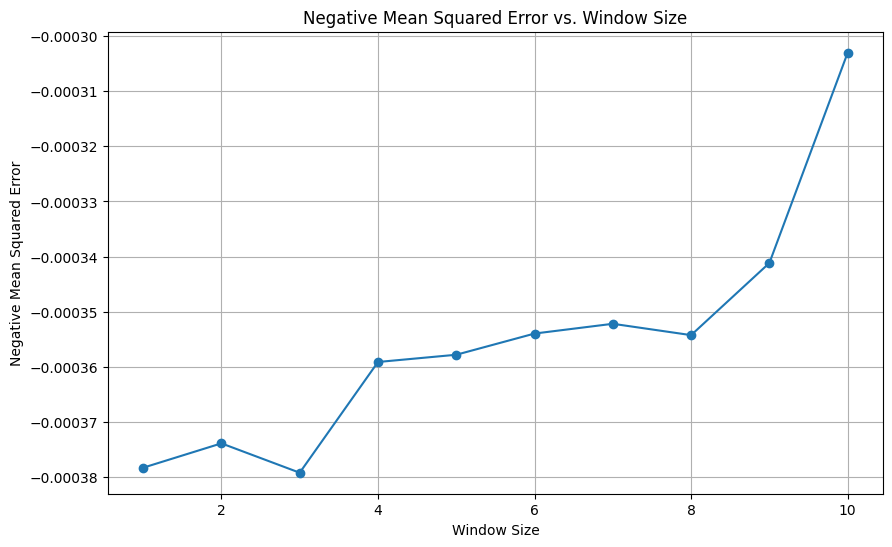

In [6]:
import matplotlib.pyplot as plt
window_sizes = list(range(1, 11))
plt.figure(figsize=(10, 6))
plt.plot(window_sizes, mse_scores, marker='o')
plt.title('Negative Mean Squared Error vs. Window Size')
plt.xlabel('Window Size')
plt.ylabel('Negative Mean Squared Error')
plt.grid(True)
plt.show()

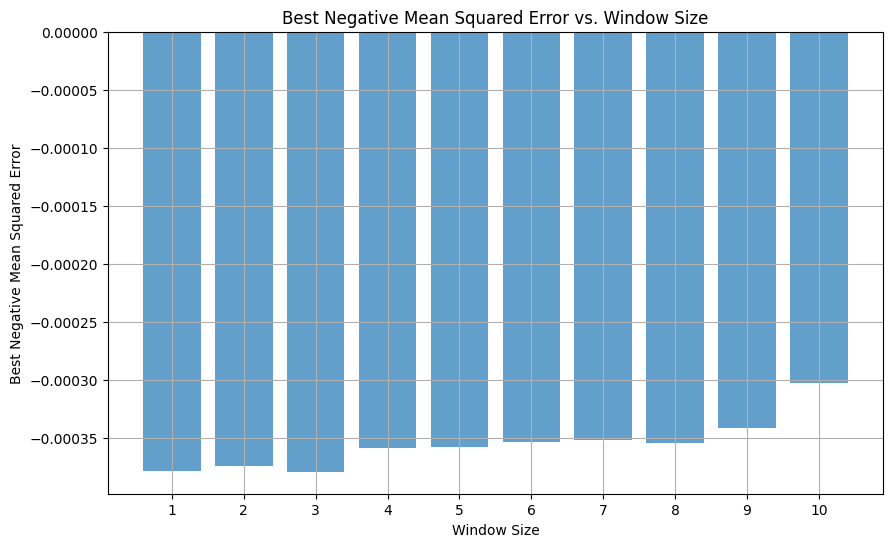

In [7]:
plt.figure(figsize=(10, 6))
plt.bar(window_sizes, [mse for mse in mse_scores], align='center', alpha=0.7)
plt.title('Best Negative Mean Squared Error vs. Window Size')
plt.xlabel('Window Size')
plt.ylabel('Best Negative Mean Squared Error')
plt.xticks(window_sizes)
plt.grid(True)
plt.show()

In [8]:
test_data=pd.read_csv('data/val.csv')
test_data

,Unnamed: 0,Open
0,1819,0.396632
1,1820,0.398211
2,1821,0.391579
3,1822,0.390632
4,1823,0.400737
...,...,...
385,2204,0.514947
386,2205,0.509263
387,2206,0.505895
388,2207,0.511158


In [9]:
test_X_windows,y_test = sliding_window(test_data['Open'], final_window_size)
test_X_windows = pd.DataFrame(test_X_windows.reshape(-1,final_window_size))
test_X_windows
print(y_test)

[0.39063158 0.40073684 0.39894737 0.39052632 0.39536842 0.38157895
 0.38894737 0.392      0.39757895 0.39873684 0.40115789 0.41084211
 0.40757895 0.41936842 0.42021053 0.41136842 0.422      0.42421053
 0.41821053 0.42652632 0.42452632 0.428      0.42589474 0.42915789
 0.42684211 0.42631579 0.42431579 0.436      0.44642105 0.43989474
 0.43105263 0.43463158 0.44536842 0.42768421 0.41915789 0.43231579
 0.43315789 0.46726316 0.47431579 0.47136842 0.46157895 0.46957895
 0.47410526 0.48010526 0.47905263 0.51936842 0.48684211 0.49189474
 0.48863158 0.48368421 0.48052632 0.46915789 0.45978947 0.44852632
 0.45273684 0.47052632 0.46052632 0.46884211 0.46378947 0.45968421
 0.46915789 0.46178947 0.44778947 0.44821053 0.46010526 0.45726316
 0.45126316 0.44536842 0.444      0.45063158 0.45452632 0.45778947
 0.45021053 0.44978947 0.46368421 0.48210526 0.47905263 0.48368421
 0.47389474 0.47484211 0.46884211 0.46347368 0.46778947 0.44168421
 0.45294737 0.45505263 0.45273684 0.44768421 0.43705263 0.4428

In [10]:
test_y_pred = final_model.predict(test_X_windows)
test_y_pred.shape,y_test.shape

((387,), (387,))

In [11]:

# Apply sliding window approach to test data

# Predict on test data


# Evaluate performance
test_y_pred = test_y_pred.flatten()
y_test = y_test.flatten()
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.0002371359585684677


## Since this model performs best in our validation set we use this model as our model for time series analysis and give its test error metric

In [12]:
test_data=pd.read_csv('data/test.csv')
test_data

,Unnamed: 0,Open
0,2209,0.511158
1,2210,0.512632
2,2211,0.518842
3,2212,0.514526
4,2213,0.522105
...,...,...
386,2595,0.661579
387,2596,0.662105
388,2597,0.700526
389,2598,0.722105


In [13]:
test_X_windows,y_test = sliding_window(test_data['Open'], final_window_size)
test_X_windows = pd.DataFrame(test_X_windows.reshape(-1,final_window_size))
test_X_windows
print(y_test)

[0.51452632 0.52210526 0.52210526 0.53368421 0.548      0.55663158
 0.55473684 0.56284211 0.57473684 0.58526316 0.592      0.58578947
 0.60157895 0.582      0.57473684 0.57336842 0.57673684 0.53789474
 0.52547368 0.51263158 0.51063158 0.53263158 0.52410526 0.52115789
 0.51494737 0.51263158 0.51684211 0.49915789 0.52073684 0.51642105
 0.50926316 0.52115789 0.52263158 0.52505263 0.51494737 0.52842105
 0.51547368 0.53168421 0.52505263 0.52694737 0.52073684 0.52021053
 0.52357895 0.52357895 0.51115789 0.49778947 0.48147368 0.49442105
 0.48147368 0.48821053 0.514      0.51115789 0.49915789 0.50157895
 0.54463158 0.51978947 0.51589474 0.50873684 0.50536842 0.50631579
 0.52357895 0.52842105 0.52884211 0.52263158 0.53031579 0.51926316
 0.50873684 0.51684211 0.51494737 0.51736842 0.51547368 0.54515789
 0.51642105 0.50494737 0.52978947 0.51884211 0.53031579 0.49873684
 0.49778947 0.50157895 0.48673684 0.49484211 0.49105263 0.50252632
 0.514      0.50736842 0.50063158 0.51115789 0.51210526 0.5121

In [14]:
test_y_pred = final_model.predict(test_X_windows)
test_y_pred.shape,y_test.shape

((388,), (388,))

In [15]:

# Apply sliding window approach to test data

# Predict on test data


# Evaluate performance
test_y_pred = test_y_pred.flatten()
y_test = y_test.flatten()
mse = mean_squared_error(y_test, test_y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.030309334807708515


## The final error from our model projects an error of 3.03 % which is lesser in comparison to 3.68% obtained from Arima 
Thus proving our model predicts it better